## **Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing Libraries**

In [ ]:
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

## **Read** **Image**

In [ ]:
img = cv2.imread('/content/drive/MyDrive/OpenCV Workshop/CatDogImage.jpeg')

### **Showing the Image**

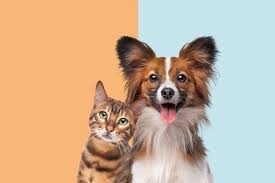

In [ ]:
cv2_imshow(img) # Use cv2_imshow instead of cv2.imshow

### **Plotting the Image using Matplotlib**

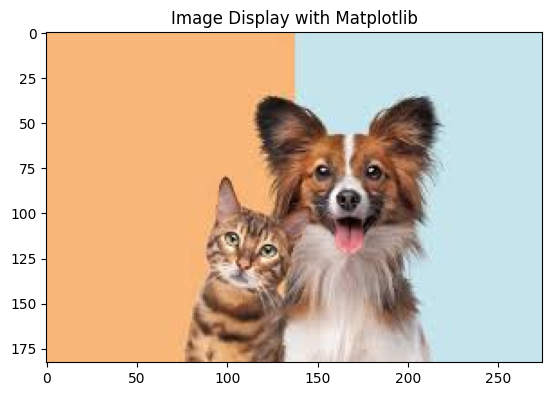

In [ ]:
# Convert BGR to RGB for Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #good parctise

# Display using Matplotlib
plt.imshow(img_rgb)
plt.title('Image Display with Matplotlib')
#plt.axis('off')
plt.show()

## **We can find out various things about image**

### **1- Image Size**

In [ ]:
print(f"Shape: {img.shape}")  # Dimensions (height, width, channels)

Shape: (183, 275, 3)


### **2- Image Shape**

In [ ]:
print(f"Size: {img.size}")    # Total number of pixels

Size: 150975


### **3- Data Type**

In [ ]:
print(f"Data type: {img.dtype}")  # Image data type

Data type: uint8


### **4- Image Type**

In [ ]:
(f"Image type: {type(img)}")

### **You can gather additional information from an image using OpenCV, such as:**

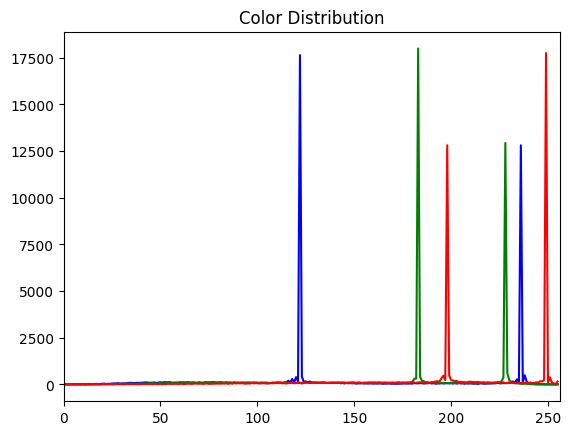

In [ ]:
#Color Distribution
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.title('Color Distribution')
plt.show()

In [ ]:
#Mean and Standard Deviation
mean, stddev = cv2.meanStdDev(img)
print(f"Mean: {mean.flatten()}, StdDev: {stddev.flatten()}")

Mean: [152.30817685 178.42597119 204.52949826], StdDev: [63.83171359 50.97616003 49.31114016]


In [ ]:
#Aspect Ratio
height, width = img.shape[:2]
aspect_ratio = width / height
print(f"Aspect Ratio: {aspect_ratio}")

Aspect Ratio: 1.5027322404371584


In [ ]:
#Pixel Intensity Statistics (used for grayscale imgaes)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray)
print(f"Min Intensity: {min_val} at {min_loc}")
print(f"Max Intensity: {max_val} at {max_loc}")

### **Extracting RGB Values at a specific pixel**

In [ ]:
(b, g, r) = img[100, 100]
print(f"Blue: {b}, Green: {g}, Red: {r}")

Blue: 137, Green: 153, Red: 196


## **Image Operation**

### **Resizing the Image**

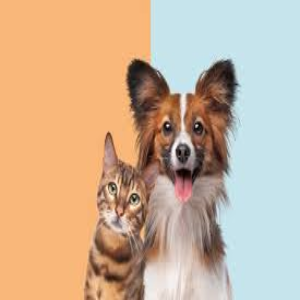

In [ ]:
resized_img = cv2.resize(img, (300, 300))
cv2_imshow(resized_img)

### **Rotating the Image**

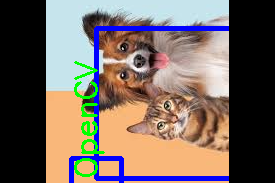

In [43]:
(h, w) = img.shape[:2] #
center = (w // 2, h // 2)
R_M = cv2.getRotationMatrix2D(center, 90, 1.0)
rotated_img = cv2.warpAffine(img, R_M, (w, h))
cv2_imshow(rotated_img)

### **Drawing on the Image**

array([[[122, 183, 249],
        [122, 183, 249],
        [122, 183, 249],
        ...,
        [236, 228, 198],
        [236, 228, 198],
        [236, 228, 198]],

       [[122, 183, 249],
        [122, 183, 249],
        [122, 183, 249],
        ...,
        [236, 228, 198],
        [236, 228, 198],
        [236, 228, 198]],

       [[122, 183, 249],
        [122, 183, 249],
        [122, 183, 249],
        ...,
        [236, 228, 198],
        [236, 228, 198],
        [236, 228, 198]],

       ...,

       [[122, 183, 249],
        [122, 183, 249],
        [122, 183, 249],
        ...,
        [236, 228, 198],
        [236, 228, 198],
        [236, 228, 198]],

       [[122, 183, 249],
        [122, 183, 249],
        [122, 183, 249],
        ...,
        [236, 228, 198],
        [236, 228, 198],
        [236, 228, 198]],

       [[122, 183, 249],
        [122, 183, 249],
        [122, 183, 249],
        ...,
        [236, 228, 198],
        [236, 228, 198],
        [236, 228, 198]]], dtype=uint8)
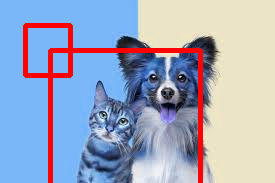

In [ ]:
# Draw a rectangle
cv2.rectangle(img, (25, 25), (70, 75), (255, 0, 0), 3)


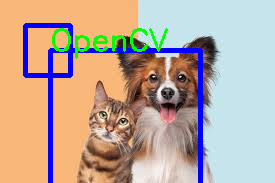

In [ ]:
# Add text to the image
cv2.putText(img, 'OpenCV', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

cv2_imshow(img)  # Use cv2_imshow instead of cv2.imshow

### **Image Cropping**

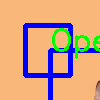

In [ ]:
cropped_img = img[0:100, 0:100]  # Specify the row and column ranges
cv2_imshow(cropped_img)

### **Converting Image to Grayscale**

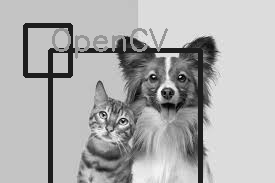

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)  # Use cv2_imshow instead of cv2.imshow

### **Changing Image Brightness**

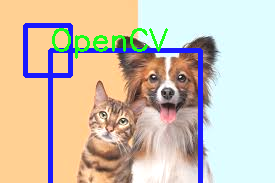

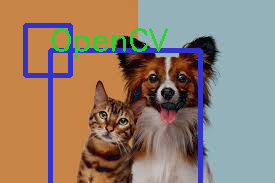

In [ ]:
brighter_img = cv2.convertScaleAbs(img, alpha=1.0, beta=25)  # Increase brightness
darker_img = cv2.convertScaleAbs(img, alpha=1.0, beta=-50)  # Decrease brightness
cv2_imshow(brighter_img) # Corrected: Only pass the image data
cv2_imshow(darker_img)

### **Padding and Masking**

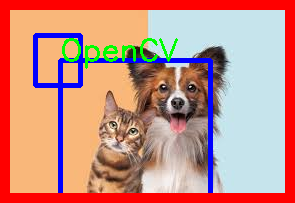

In [ ]:
#Padding
bordered_img = cv2.copyMakeBorder(img, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=(0, 0, 255))
cv2_imshow(bordered_img)  # Corrected: Only pass the image data

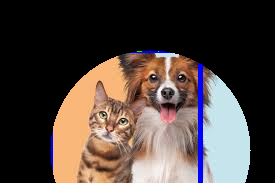

In [ ]:
#Masking

mask = np.zeros(img.shape[:2], dtype='uint8')
cv2.circle(mask, (150, 150), 100, 255, -1)  # Draw a filled circle as the mask
masked_img = cv2.bitwise_and(img, img, mask=mask)
cv2_imshow(masked_img) # Use cv2_imshow instead of cv2.imshow

### **Histogram Equalization**

In [ ]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equalized_img = cv2.equalizeHist(gray_img)
cv2_imshow(equalized_img) # Use cv2_imshow instead of cv2.imshow

### **Blending Two Images**

In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/OpenCV Workshop/messi1.jpg')
img2 = cv2.imread('/content/drive/MyDrive/OpenCV Workshop/ronaldo2.jpeg')

print(f"Shape: {img2.shape}")

Shape: (183, 275, 3)


In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/OpenCV Workshop/messi1.jpg')
img2 = cv2.imread('/content/drive/MyDrive/OpenCV Workshop/ronaldo2.jpeg')


# Resize img2 to match the dimensions of img1
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Now perform the blending operation
blended_img = cv2.addWeighted(img1, 0.3, img2, 0.7, 0)

# Display the blended image using cv2_imshow instead of cv2.imshow
cv2_imshow(blended_img)

Output hidden; open in https://colab.research.google.com to view.

# **Working with Videos**

### **Reading and Displaying a Video**

In [44]:
#Reading the video
cap = cv2.VideoCapture('/content/drive/MyDrive/OpenCV Workshop/vid1.mp4')

cap.release()
cv2.destroyAllWindows()

In [46]:
# Define codec and create VideoWriter to save the output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output_video.mp4', fourcc, 30.0, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Process the frame (e.g., convert to grayscale)
    # gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # out.write(cv2.cvtColor(gray_frame, cv2.COLOR_GRAY2BGR))  # Save processed frames

    # Save the original frame instead
    out.write(frame)

cap.release()
out.release()

# Display the saved video
from IPython.display import HTML
from base64 import b64encode

# Convert video to base64 for inline playback
video_path = "/content/drive/MyDrive/OpenCV Workshop/vid1.mp4"
video_file = open(video_path, "rb").read()
video_b64 = b64encode(video_file).decode()

HTML(f"""
<video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{video_b64}" type="video/mp4">
</video>
""")


### **Processing Video Frames**

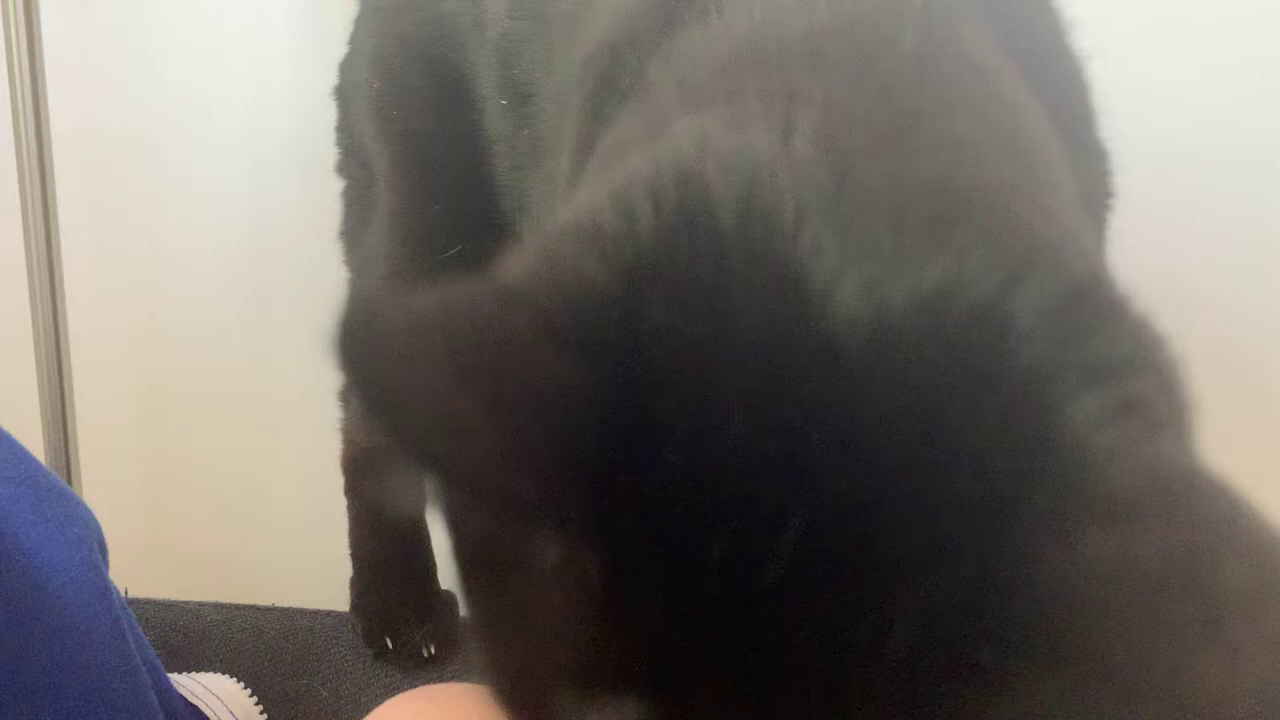

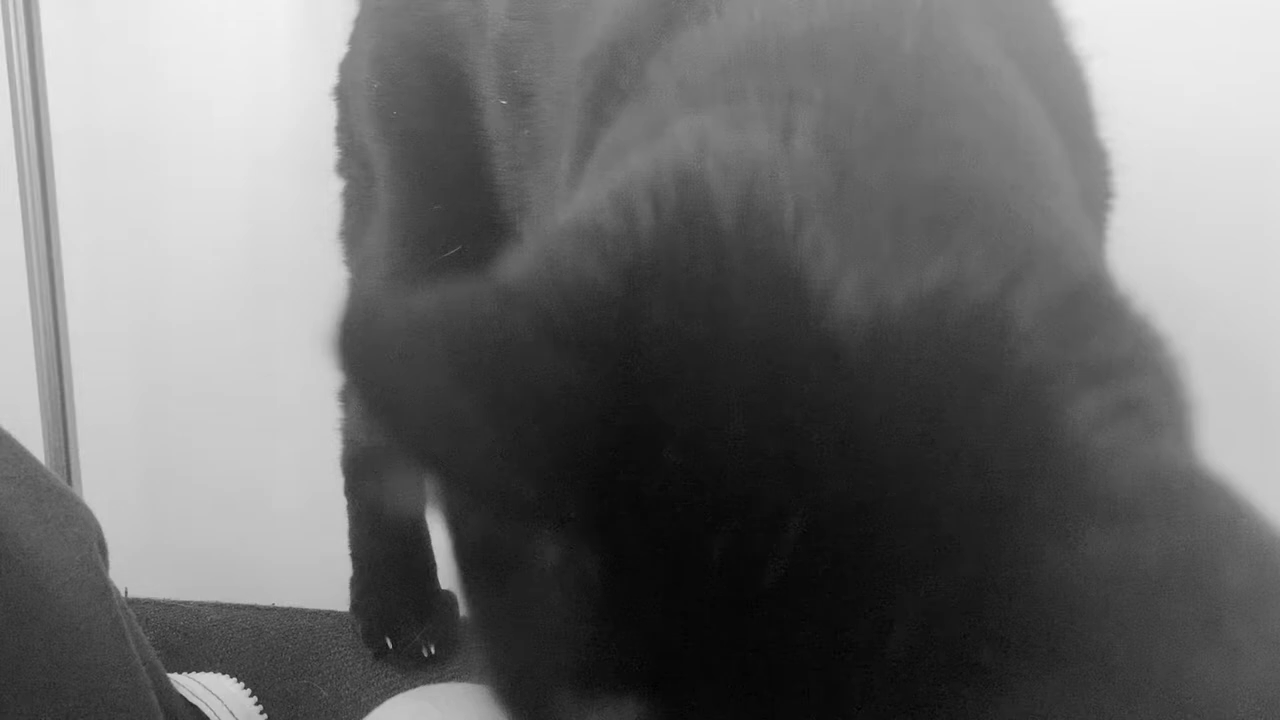

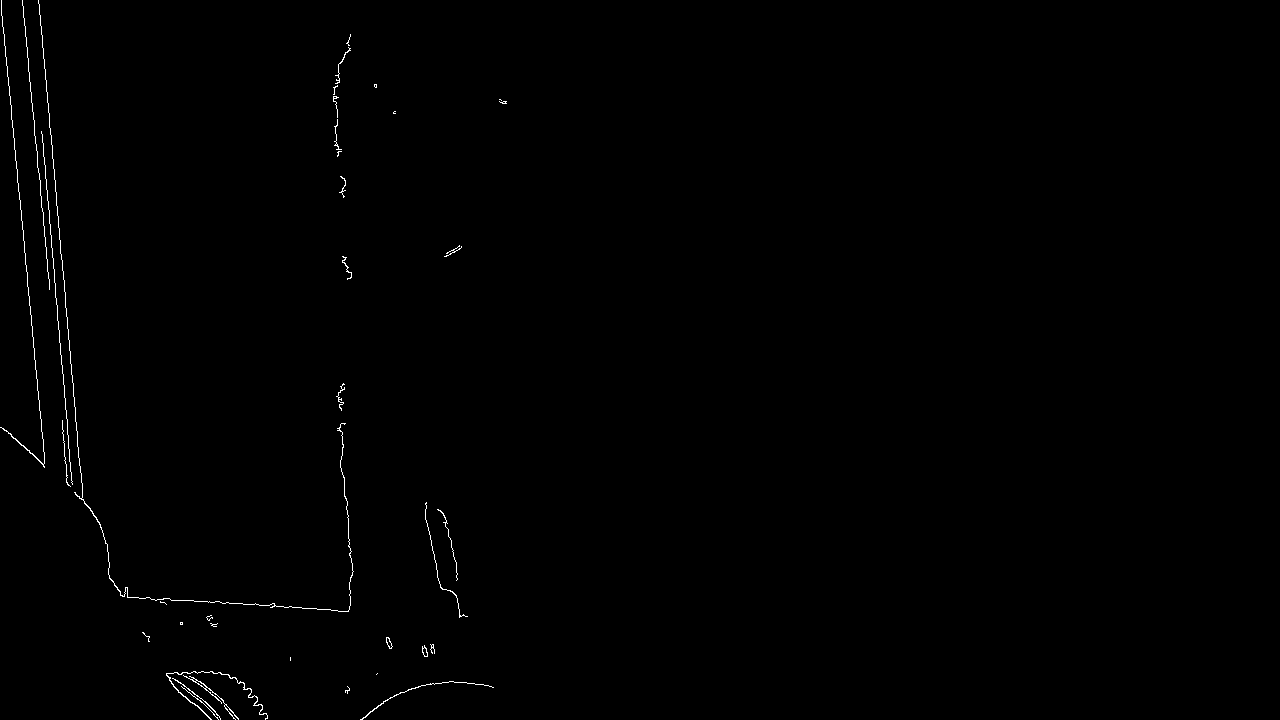

In [47]:
#Reading the video
cap = cv2.VideoCapture('/content/drive/MyDrive/OpenCV Workshop/vid1.mp4')

# Read a frame from the video
ret, frame = cap.read()

if ret:  # Check if a frame was successfully read
    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply edge detection on the grayscale frame
    edges_frame = cv2.Canny(gray_frame, 100, 200)

    # Display the original, grayscale, and edge-detected frames side by side
    cv2_imshow(frame)
    cv2_imshow(gray_frame)
    cv2_imshow(edges_frame)

else:
    print("Error: Could not read a frame from the video.")

cap.release()
cv2.destroyAllWindows()

# **Object Detection**

## **Object Detection in Image**

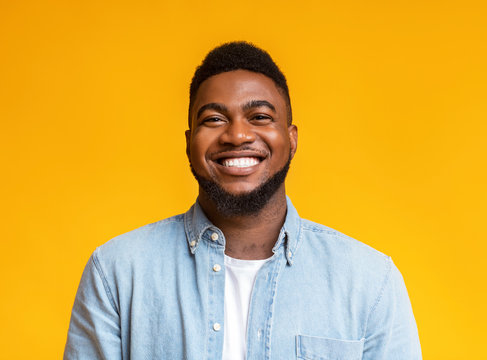

(360, 487, 3)


In [49]:
imagePath = '/content/drive/MyDrive/OpenCV Workshop/test1.jpg'

#Read the Image
test_image = cv2.imread(imagePath)
cv2_imshow(test_image)
#Image Shape
print(test_image.shape)

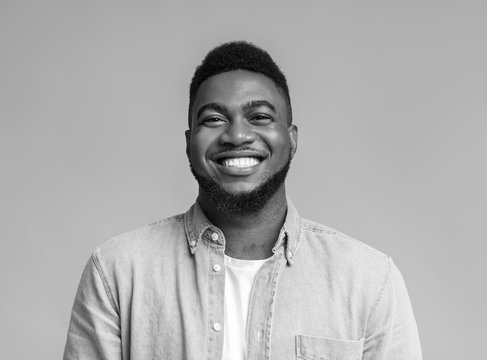

(360, 487)


In [50]:
#Grayscale
gray_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)
print(gray_image.shape)

In [51]:
#Load Classifier
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [52]:
#Perform Face Detection
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [53]:
#Drawing the Bounding Box
for (x, y, w, h) in face:
    cv2.rectangle(test_image, (x, y), (x + w, y + h), (0, 255, 0), 4)

In [54]:
#Displaying the Image
img_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

(-0.5, 486.5, 359.5, -0.5)

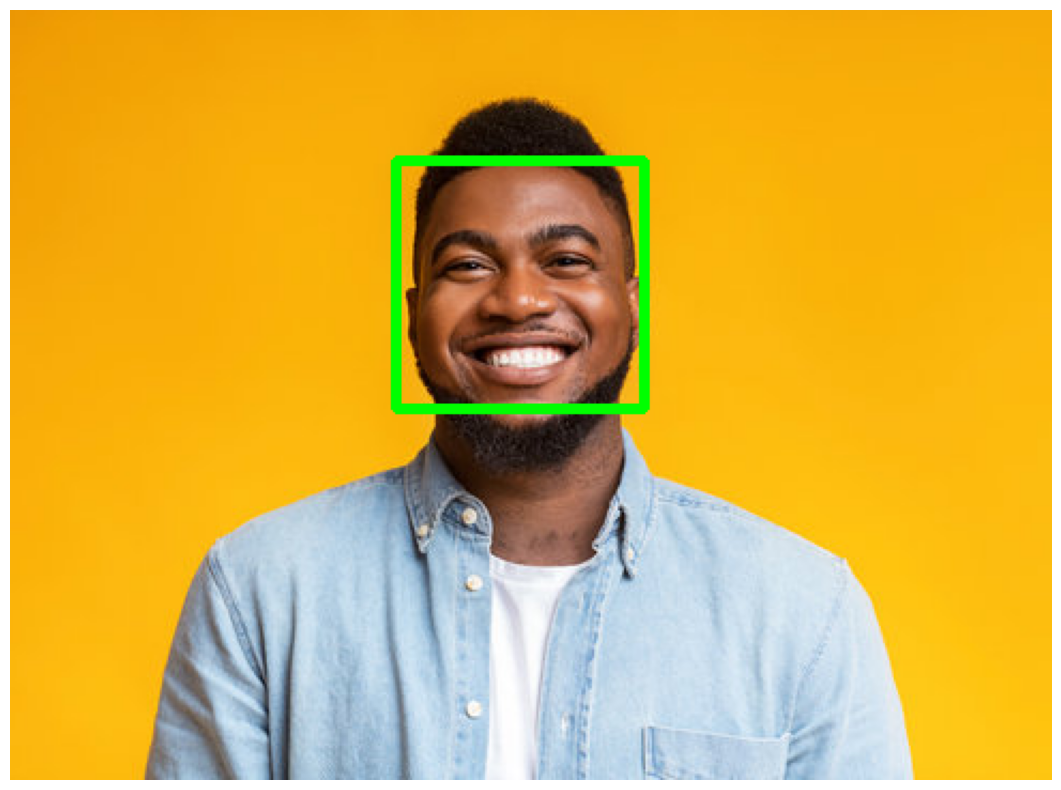

In [55]:
#Using Matplotlib
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

## **Object Detection in Video**

In [ ]:
# Load the Haar cascade for face detection
# Update the path to the correct location of the Haar cascade file:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open video capture
cap = cv2.VideoCapture('/content/drive/MyDrive/testvid1.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Display the frame with detected faces
    cv2_imshow(frame)

    # Exit loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [56]:
video_capture = cv2.VideoCapture(0)